<a href="https://colab.research.google.com/github/khwahish2oo2/Fake_News_Classifier/blob/main/Fake_News_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import re #regular Expresson
import nltk                                 #Natural Language ToolKit
nltk.download('stopwords')
from nltk.corpus import stopwords           #Include to remove stopwords like a, the, 
from nltk.stem.porter import PorterStemmer  #for stemming finding the base word
from sklearn.feature_extraction.text import CountVectorizer #For Bag Of Words
from sklearn.model_selection import train_test_split        #For Splitting our dataset into testing and training data                                                                                                                
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
df2=pd.read_csv('train.csv')             #Here i am taking only the training dataset and will split it later
df=df2[["id","title","author","text","label"]]

In [76]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [77]:
df=df.dropna() #dropping the null values

In [78]:
df.shape

(18285, 5)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


In [80]:
x=df.drop('label',  axis=1) #Getting the independent features by dropping dependent variable: label

In [81]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [82]:
# dependent Variable
y=df['label']

In [83]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [84]:
news=df.copy()

In [85]:
news.reset_index(inplace=True) #Done because after dropping NULL values their might be some inconsistencies in indexes

In [86]:
#stemming
ps = PorterStemmer() #Stemming takes less amount of time
corpus=[]            #Empty Corpus
for i in range(0, len(news)):       #col    #row
            #substitute 
  review=re.sub('[^a-zA-Z]', ' ', news['title'][i]) #now removing all the words except alphabetic characters and replaing by space 
  review=review.lower() #lower all the text to avoid duplicacy
  review=review.split() #Splitting in words

  review=[ps.stem(word) for word in review if not word in stopwords.words('english')] #if the word directly does not belong to the dict then only we need to apply porters stemmer
  review=' '.join(review)
  corpus.append(review)

In [87]:
#Look on our Corpus in form of List
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

Trying with Bag of Words

In [88]:
#Count Vectorizer                       #Ngram: Giving the compination from Unigram to Trigram;
cv = CountVectorizer(max_features=5000, ngram_range=(1,3)) #taking only 5000 max important features formed By Ngrams;
X=cv.fit_transform(corpus).toarray()

In [89]:
X.shape

(18285, 5000)

In [90]:
y=news['label']

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33,random_state=0)

In [92]:
#The version of sklearn you are using is greater than 1.0. The method get_feature_names_out() substitutes the already deprecated and removed get_feature_names() one
cv.get_feature_names_out()[:50]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest', 'accid', 'accident',
       'accord', 'account', 'accus', 'accus trump', 'achiev',
       'acknowledg', 'acknowledg emf', 'acknowledg emf damag', 'aclu',
       'acquit', 'acquitt', 'acr', 'across', 'act', 'act like', 'act new',
       'act new york', 'action', 'activ', 'activist', 'actor', 'actual',
       'ad', 'adam', 'add', 'addict', 'address', 'adhd'], dtype=object)

In [93]:
cv.get_params()            # 

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [94]:
count_df=pd.DataFrame(X_train, columns=cv.get_feature_names_out())

In [95]:
count_df.tail()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
12245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
#copied from HTML File: scikit-learn.org/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [97]:
classifier=MultinomialNB() #for Text Data multinomial naive bayes works well and also for multi-classification

accuracy:   0.902
Confusion matrix, without normalization


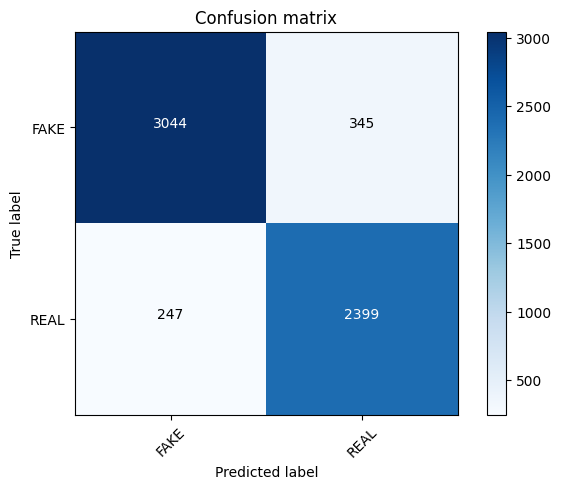

In [98]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Using TF-IDF: 

In [99]:
messages=df.copy()

In [100]:
messages.reset_index(inplace=True)

In [101]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [102]:
messages['text'][6]

'PARIS  —   France chose an idealistic, traditional   candidate in Sunday’s primary to represent the Socialist and   parties in the presidential election this spring. The candidate, Benoît Hamon, 49, who ran on the slogan that he would “make France’s heart beat,” bested Manuel Valls, the former prime minister, whose campaign has promoted more   policies and who has a strong    background. Mr. Hamon appeared to have won by a wide margin, with incomplete returns showing him with an estimated 58 percent of the vote to Mr. Valls’s 41 percent. “Tonight the left holds its head up high again it is looking to the future,” Mr. Hamon said, addressing his supporters. “Our country needs the left, but a modern, innovative left,” he said. Mr. Hamon’s victory was the clearest sign yet that voters on the left want a break with the policies of President François Hollande, who in December announced that he would not seek  . However, Mr. Hamon’s strong showing is unlikely to change widespread assessments

In [103]:
#Removing all the special characters from the text
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps=PorterStemmer()
corpus=[]
for i in range(0, len(messages)):
          #substitute all chars except a-z and A-Z with space
  review=re.sub('[^a-zA-Z]', ' ', messages['title'][i]) #now removing all the words expent alphabetic characters and replaing by space 
  review=review.lower() #lower all the text to avoid duplicacy
  review=review.split() #Splitting in words

  review=[ps.stem(word) for word in review if not word in stopwords.words('english')] #if the word directly does not belong to the dict then only we need to aplly porters stemmer
  review=' '.join(review)
  corpus.append(review)

In [104]:
corpus[3]

'civilian kill singl us airstrik identifi'

In [106]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray() #converting corpus to vector

In [107]:
X.shape

(18285, 5000)

In [108]:
y=messages['label']

In [109]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [110]:
tfidf_v.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

In [111]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [112]:
#This will show your actual vector looks like
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names_out())

In [113]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Applying Passive Aggressive Classifier Algorithm

In [120]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.920
Confusion matrix, without normalization


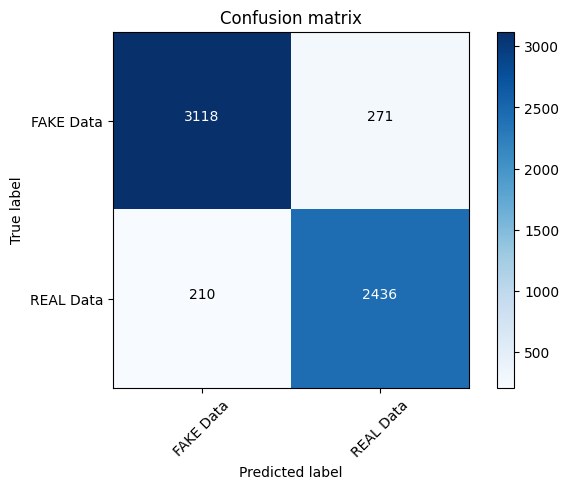

In [121]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

Applying MultinomialNB Algorithm:

In [116]:
classifier=MultinomialNB()

accuracy:   0.881
Confusion matrix, without normalization


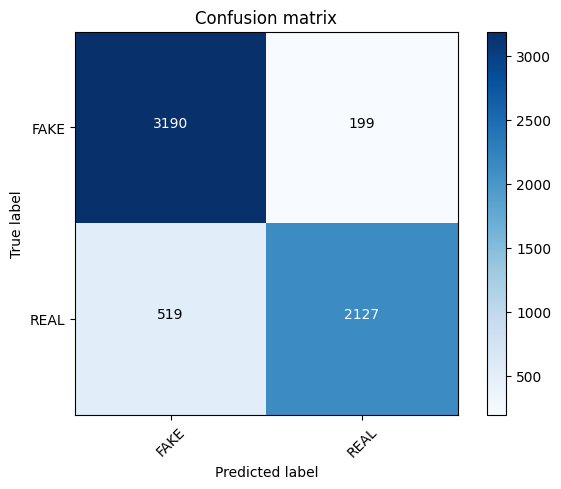

In [118]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test) 
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Applying Logistic Regression

In [138]:
#create a new logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

 Applying k-nearest neighbors algorithm

In [131]:
#create new a knn model
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [132]:
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)

{'n_neighbors': 1}


Applying Random forests: 

In [128]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
params_rf = {'n_estimators': [50, 100, 200]}
rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200]})

In [129]:
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

{'n_estimators': 100}


Checking Score for all the above algorithms: 

In [161]:
print('log_reg: {}'.format(log_reg.score(X_test, y_test)))
print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))

log_reg: 0.9224523612261806
knn: 0.6334714167357084
rf: 0.9337199668599834


Finally Applying Ensemble Learning: 

In [141]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', log_reg)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

Our Accuracy score is best among all individual Classifiers using Ensemble learning 

In [142]:
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

0.9267605633802817

Trying to use Word2Vec(Word Embeddings)

In [146]:
train_list = df['title'].str.split().to_list()

In [147]:
train_list

[['House',
  'Dem',
  'Aide:',
  'We',
  'Didn’t',
  'Even',
  'See',
  'Comey’s',
  'Letter',
  'Until',
  'Jason',
  'Chaffetz',
  'Tweeted',
  'It'],
 ['FLYNN:',
  'Hillary',
  'Clinton,',
  'Big',
  'Woman',
  'on',
  'Campus',
  '-',
  'Breitbart'],
 ['Why', 'the', 'Truth', 'Might', 'Get', 'You', 'Fired'],
 ['15',
  'Civilians',
  'Killed',
  'In',
  'Single',
  'US',
  'Airstrike',
  'Have',
  'Been',
  'Identified'],
 ['Iranian',
  'woman',
  'jailed',
  'for',
  'fictional',
  'unpublished',
  'story',
  'about',
  'woman',
  'stoned',
  'to',
  'death',
  'for',
  'adultery'],
 ['Jackie',
  'Mason:',
  'Hollywood',
  'Would',
  'Love',
  'Trump',
  'if',
  'He',
  'Bombed',
  'North',
  'Korea',
  'over',
  'Lack',
  'of',
  'Trans',
  'Bathrooms',
  '(Exclusive',
  'Video)',
  '-',
  'Breitbart'],
 ['Benoît',
  'Hamon',
  'Wins',
  'French',
  'Socialist',
  'Party’s',
  'Presidential',
  'Nomination',
  '-',
  'The',
  'New',
  'York',
  'Times'],
 ['A',
  'Back-Channel',
  

In [148]:
from gensim.models import Word2Vec
EMBEDDING_DIM = 100

w2v_model = Word2Vec(sentences=train_list, vector_size=EMBEDDING_DIM, window=5, min_count=1)

In [149]:
len(w2v_model.wv.key_to_index)

37887

In [150]:
w2v_model.wv['the']

array([-0.07307401,  1.1082469 ,  1.5948565 , -0.24151161, -0.18467647,
       -2.1984777 ,  0.54691994,  1.8289541 , -0.70978534, -1.7221218 ,
       -1.2613745 , -2.2943978 , -0.15958525, -0.33430555,  1.0776249 ,
       -0.96751714,  0.62870365, -1.375077  ,  0.17060336, -3.6790924 ,
        0.37665942,  1.4887469 ,  1.1205919 , -1.0929518 , -1.0985211 ,
        0.36008373, -2.24128   , -1.1032741 , -0.758514  ,  0.16355278,
        1.1912755 ,  0.09909657,  0.83893776, -1.0273978 , -0.7456935 ,
        1.7244881 ,  0.06347679, -0.45373857, -1.2756307 , -2.2336607 ,
        0.953204  , -1.7689184 ,  0.46920896,  0.07408235,  0.12852763,
       -1.2619007 , -1.2782298 , -0.8166327 ,  0.81918395,  1.1308666 ,
        0.41044515, -1.5117923 ,  0.40000045,  0.7212859 , -1.2101339 ,
        0.60539377,  0.80301523,  0.02252278, -0.8714692 ,  0.4088491 ,
        0.9147516 , -0.77385813,  0.24853784,  0.47497514, -0.9187198 ,
        1.9547762 , -0.6062183 ,  0.6555715 , -1.4519948 ,  0.46

In [151]:
w2v_model.wv.vectors.shape

(37887, 100)

In [152]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_list)

X = tokenizer.texts_to_sequences(train_list)

In [155]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 700 
X = pad_sequences(X, maxlen=maxlen)

In [156]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

33278

In [157]:
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
    return weight_matrix